El dataset proviene de dataset_url = 'http://www.robots.ox.ac.uk/~vgg/data/pets/data/images.tar.gz'

In [ ]:
#Desde ahi se extrae y normaliza para utilizar en el modelo, primero estrayendo y despues organizando por subdirectorios:
#NO RUNNEAR al menos que no se tenga el dataset
x=NoRunnear()#borrar

import os
import shutil

def download_and_extract_dataset(url, dest_path):
    if not os.path.exists(dest_path):
        os.makedirs(dest_path)
    
    data_file = os.path.join(dest_path, 'images.tar.gz')
    if not os.path.exists(data_file):
        urllib.request.urlretrieve(url, data_file)
        print(f"Downloaded dataset to {data_file}")

    with tarfile.open(data_file) as tar:
        tar.extractall(path=dest_path)
        print(f"Extracted dataset to {dest_path}")


dataset_url = 'http://www.robots.ox.ac.uk/~vgg/data/pets/data/images.tar.gz'
dest_path = './data/pets'

download_and_extract_dataset(dataset_url, dest_path)



source_dir = './data/pets/images'
target_dir = './data/pets/formatted_images'

os.makedirs(target_dir, exist_ok=True)


for filename in os.listdir(source_dir):
    if filename.endswith('.jpg'):  
        class_name = filename.split('_')[0]  
        class_dir = os.path.join(target_dir, class_name)
        os.makedirs(class_dir, exist_ok=True) 
        source_file = os.path.join(source_dir, filename)
        target_file = os.path.join(class_dir, filename)
        shutil.move(source_file, target_file)  

print("Images have been organized into subdirectories by class.")

            Class  Image Count
0         english          400
1        american          400
2      Abyssinian          200
3         Ragdoll          200
4       miniature          200
5    newfoundland          200
6         Persian          200
7      pomeranian          200
8             pug          200
9         Russian          200
10          saint          200
11        samoyed          200
12          shiba          200
13        Siamese          200
14         Sphynx          200
15        wheaten          200
16          Maine          200
17     leonberger          200
18       keeshond          200
19       japanese          200
20         basset          200
21         beagle          200
22         Bengal          200
23         Birman          200
24         Bombay          200
25          boxer          200
26        British          200
27      chihuahua          200
28       Egyptian          200
29         german          200
30          great          200
31      

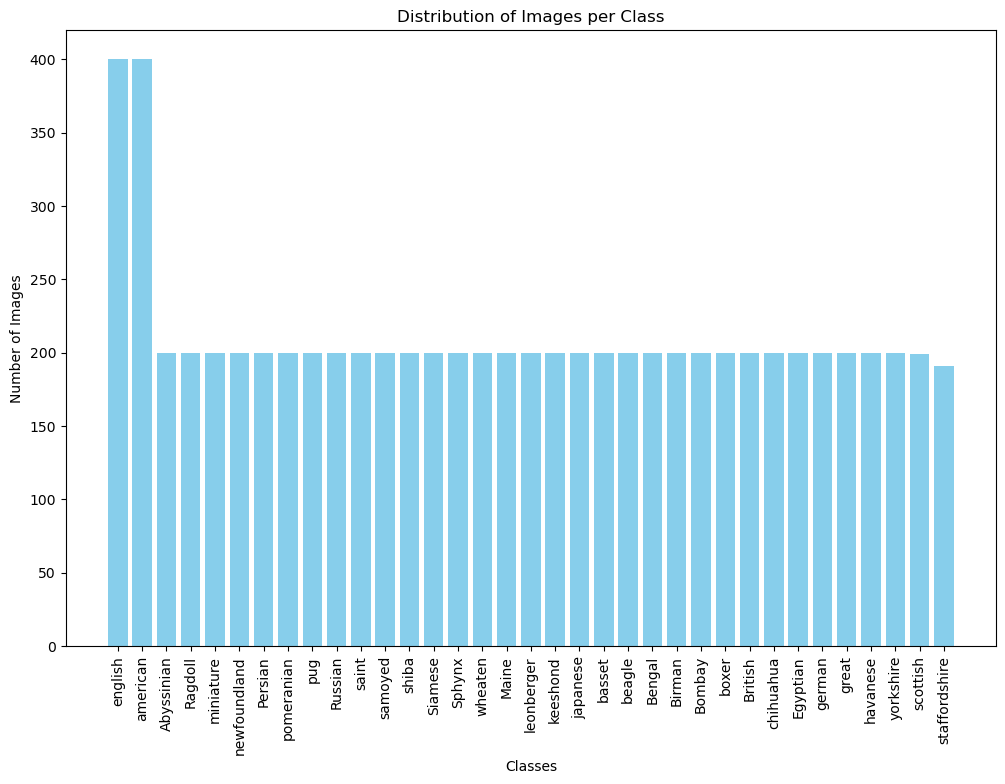

In [3]:
# Import necessary libraries
import os
import matplotlib.pyplot as plt
import pandas as pd
from PIL import Image

data_dir = './data/pets/formatted_images'

def explore_data(directory):
    class_dict = {}   
    for folder in os.listdir(directory):
        folder_path = os.path.join(directory, folder)
        if os.path.isdir(folder_path):
            count = len([name for name in os.listdir(folder_path) if os.path.isfile(os.path.join(folder_path, name))])
            class_dict[folder] = count

    df = pd.DataFrame(list(class_dict.items()), columns=['Class', 'Image Count'])
    df = df.sort_values(by='Image Count', ascending=False).reset_index(drop=True)
    return df

df_classes = explore_data(data_dir)
print(df_classes)

plt.figure(figsize=(12, 8))
plt.bar(df_classes['Class'], df_classes['Image Count'], color='skyblue')
plt.xlabel('Classes')
plt.ylabel('Number of Images')
plt.title('Distribution of Images per Class')
plt.xticks(rotation=90)  
plt.show()


Se puede ver un poco de desbalance en cuanto al numero de datos dentro del dataset, pero se mantendra, al considerar que no es excesivo.
Despues, si se estudia imagen a imagen, se ve que existen bastantes imagenes donde aunque este señalada la raza, no es facil de distinguir, ya sea por
luz, falta de rasgos caracteristicos y colores muy similares, etc

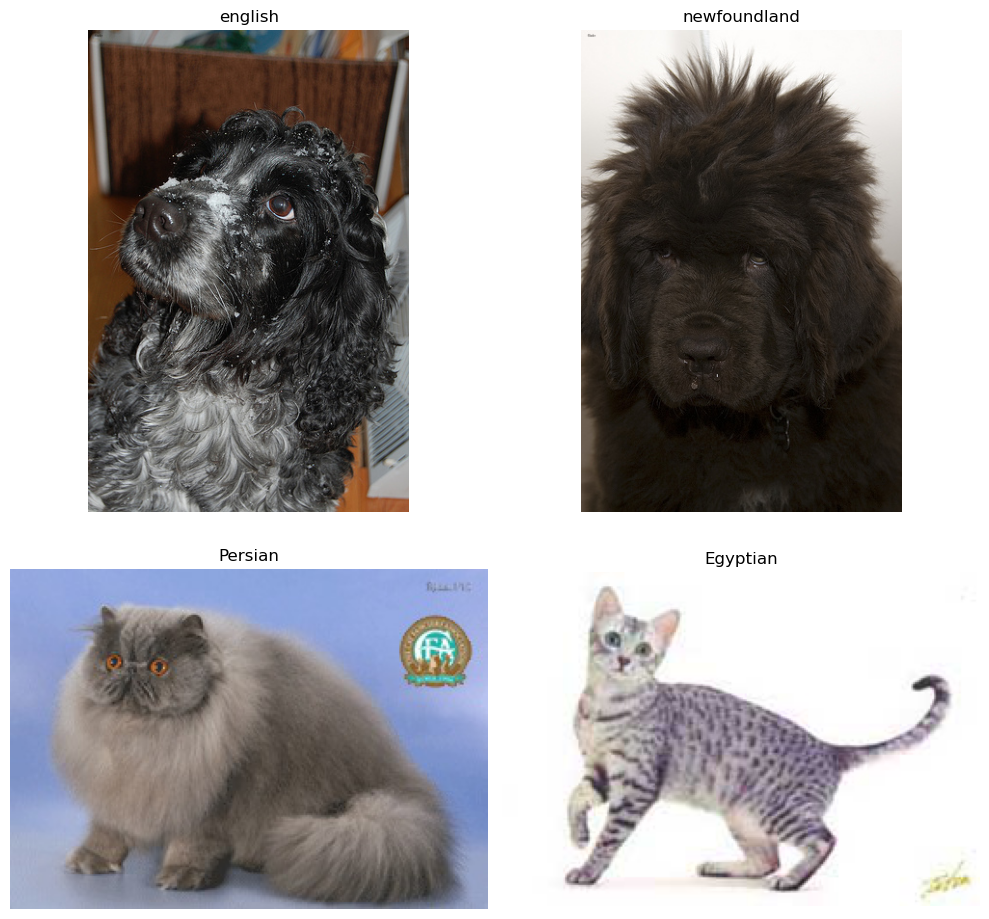

In [5]:
#ejemplos para ver ejemplos de imagenes
data_dir = './data/pets/formatted_images'
class_directories = ['english', 'newfoundland', 'Persian', 'Egyptian']# se puede cambiar por cualquiera de las clases mostradas antes
#esto solo carga las primeras imagenes de cada folder en './data/pets/formatted_images'
def load_first_images(data_dir, class_directories):
    images = []
    labels = []
    for class_dir in class_directories:
        class_path = os.path.join(data_dir, class_dir)
        if os.path.isdir(class_path):
            for file in os.listdir(class_path):
                if file.lower().endswith(('.jpg')):
                    img_path = os.path.join(class_path, file)
                    image = Image.open(img_path)
                    images.append(image)
                    labels.append(class_dir)
                    break
    return images, labels

images, labels = load_first_images(data_dir, class_directories)

fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(10, 10))
axs = axs.flatten()

for ax, image, label in zip(axs, images, labels):
    ax.imshow(image)
    ax.set_title(label)
    ax.axis('off')

plt.tight_layout()
plt.show()
